In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Social_Network_Ads.csv")

In [4]:
# Step 2: Data Preprocessing
# Drop the 'User ID' column as it is not useful for classification
df = df.drop(columns=['User ID'])

# Encode the 'Gender' column (Male = 1, Female = 0)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


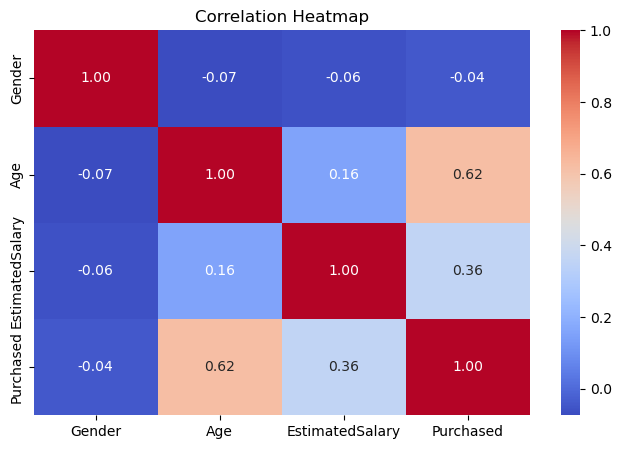

In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(8, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Step 4: Define features (X) and target (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Step 5: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train the Naïve Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [7]:
# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Confusion Matrix:
 [[50  2]
 [ 3 25]]
Accuracy: 93.75%
Precision: 92.59%
Recall: 89.29%
F1 Score: 90.91%
